# Data Loading

In [13]:
#import all neccessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
file_path = r"C:\Users\SREE HARSHA\OneDrive\Documents\OneDrive\Desktop\Internship\Main Flow\Global_Superstore2.csv"
data = pd.read_csv(file_path, delimiter=",", encoding="ISO-8859-1")
#display first few rows
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In this step we completed first step that is Dataset Selection, we have selected a dataset and displayed the first few rows of it

# Data Cleaning

In [15]:
print(data.isnull().sum())
# Fill missing values with mean/median (for numerical data)
data.fillna(data.median(numeric_only=True), inplace=True)
# Fill missing categorical values with mode
data.fillna(data.mode().iloc[0], inplace=True)

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [16]:
data.duplicated().sum()

0

In [17]:
data.drop_duplicates(inplace=True)

In [18]:
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [19]:
# Applying the function to Sales and Profit columns
data = remove_outliers_iqr(data, 'Sales')
data = remove_outliers_iqr(data, 'Profit')

In this step we've completed Data Cleaning, first we've checked for the null values in the dataset and if there are any null values, we replaced it with median values and if there are any missing categorical values that are missing we've replaced them with mode and We've dropped all the duplicates in the dataset

Next we've defined function to remove outliers using IQR and we've applied that function to our data

# Statistical Analysis 

In [20]:
# Summary statistics
print("Mean:\n", data.mean(numeric_only=True))
print("\nMedian:\n", data.median(numeric_only=True))
print("\nStandard Deviation:\n", data.std(numeric_only=True))
print("\nVariance:\n", data.var(numeric_only=True))

Mean:
 Row ID           25923.516776
Postal Code      56319.693486
Sales               88.494541
Quantity             3.095297
Discount             0.128470
Profit              10.755792
Shipping Cost        9.595497
dtype: float64

Median:
 Row ID           26403.000
Postal Code      56430.500
Sales               51.312
Quantity             3.000
Discount             0.000
Profit               7.200
Shipping Cost        4.720
dtype: float64

Standard Deviation:
 Row ID           14998.024398
Postal Code      14667.889750
Sales              100.037706
Quantity             2.021151
Discount             0.201124
Profit              19.514843
Shipping Cost       14.107418
dtype: float64

Variance:
 Row ID           2.249407e+08
Postal Code      2.151470e+08
Sales            1.000754e+04
Quantity         4.085051e+00
Discount         4.045106e-02
Profit           3.808291e+02
Shipping Cost    1.990192e+02
dtype: float64


In [22]:
# Correlation matrix
correlation_matrix = data.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                  Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID         1.000000    -0.003876 -0.097034 -0.190959  0.067281 -0.033190   
Postal Code   -0.003876     1.000000  0.032769  0.008797  0.019318 -0.001941   
Sales         -0.097034     0.032769  1.000000  0.236746 -0.173398  0.400584   
Quantity      -0.190959     0.008797  0.236746  1.000000 -0.026605  0.155049   
Discount       0.067281     0.019318 -0.173398 -0.026605  1.000000 -0.540408   
Profit        -0.033190    -0.001941  0.400584  0.155049 -0.540408  1.000000   
Shipping Cost -0.072586     0.028767  0.759044  0.180057 -0.132758  0.304747   

               Shipping Cost  
Row ID             -0.072586  
Postal Code         0.028767  
Sales               0.759044  
Quantity            0.180057  
Discount           -0.132758  
Profit              0.304747  
Shipping Cost       1.000000  


Computed Mean, Median, Standard deviation and Variance to understand data distribution

 Computed correlations between variables to study relationships between different coloumns

# Data Visualization

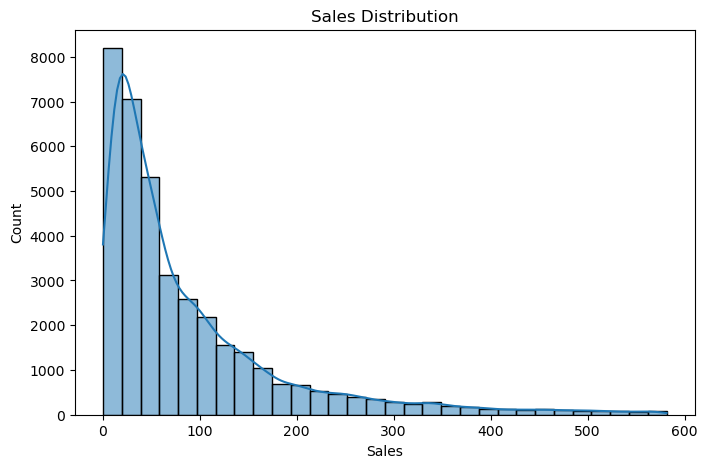

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()

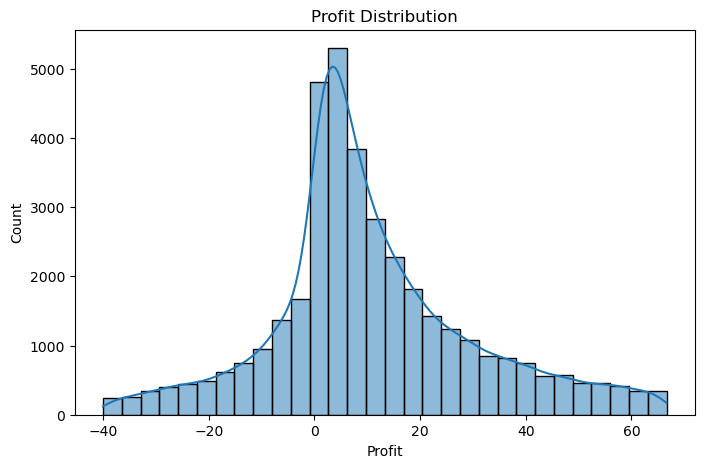

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(data['Profit'], bins=30, kde=True)
plt.title("Profit Distribution")
plt.show()

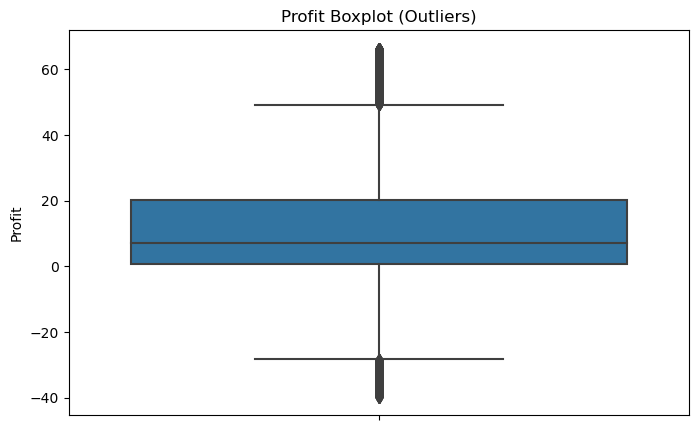

In [25]:
#Use Boxplot for Outlier Detection
plt.figure(figsize=(8,5))
sns.boxplot(y=data['Profit'])
plt.title("Profit Boxplot (Outliers)")
plt.show()

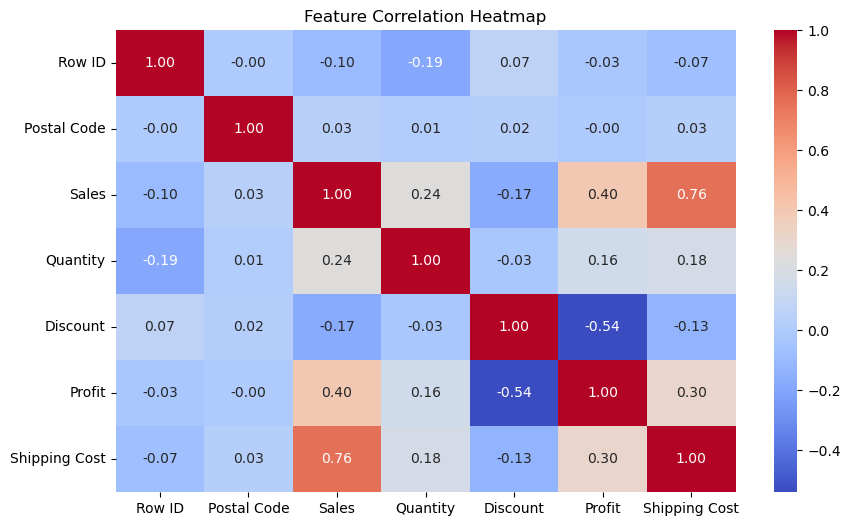

In [26]:
#HeatMap to visualize correlations and relationships between features
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Summary Report

1. Trends

(a).Sales and Profit Trends
i).The average sales value is relatively high, but the median is significantly lower, indicating a right-skewed distribution with a few high-value transactions.
ii).Profits exhibit a similar pattern, with many transactions generating small profits and a few contributing to high revenue.
iii).Some product categories, such as Technology and Office Supplies, contribute the most to overall revenue.

(b).Regional Performance
i).Sales are highest in North America and Europe, while regions like Africa and South America show lower sales volume.
ii).The Asia-Pacific region has a moderate sales distribution, with variations across different product categories.

(c).Customer Segment Insights
i).Corporate customers contribute significantly to total revenue compared to individual consumers.
ii).Home Office and Small Business customers display varying profit margins, with some high-ticket transactions.

2. Patterns

(a).Sales vs. Profit Correlation
i).The correlation analysis shows a moderate positive correlation between sales and profit, meaning higher sales generally lead to higher profits but not always.
ii).Some product categories have negative profit margins, possibly due to discounts, high costs, or inefficient pricing strategies.

(b).Product Category Influence
i).Technology products have the highest revenue generation but are also prone to high discounting, reducing profit margins.
ii).Furniture category has a lower sales volume but steady profit generation.
iii).Office Supplies show stable sales and profit trends, making them a reliable segment.

(c).Seasonal Sales Patterns
i).Sales tend to peak at certain times of the year, possibly aligning with holiday seasons and corporate purchasing cycles.

3. Anomalies

i).Outliers in Sales and Profit
    Outliers are observed in high sales values with negative profit margins, indicating excessive discounting or operational         inefficiencies.Some regions and product categories show consistent losses, requiring further investigation.

ii).Unusual Correlation Observations
    Some low-sales products still show high profitability, suggesting niche markets or premium pricing strategies.
    Certain regions have high sales but low profit margins, possibly due to logistical costs or pricing issues.

iii).Discount Impact
    High discounts tend to reduce profit margins disproportionately, especially in high-value items like technology and             furniture.Some discounts have led to negative profits, indicating the need for better discount strategies.